In [1]:
import os
import sys
import yaml
import torch
import logging
import numpy as np
import seaborn as sn
from tqdm import tqdm
import matplotlib.pyplot as plt
from pytorch_lightning import seed_everything
sys.path.append('../')
plt.style.use('science')


/home/marshall/miniconda3/envs/sci/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/marshall/miniconda3/envs/sci/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZNK3c107SymBool10guard_boolEPKcl'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
path_results = '../results/'
path_cooperative = os.path.join(path_results, 'cooperative')
path_lrn = os.path.join(path_results,'lrn')

In [3]:
lrn_lensInit_folders = os.listdir(os.path.join(path_lrn, "lensInit"))
lrn_lensInit_folders.sort()

lrn_randomInit_folders = os.listdir(os.path.join(path_lrn, "randomInit"))
lrn_randomInit_folders.sort()

cooperative_analyticalLrn_folders = os.listdir(os.path.join(path_cooperative, "analyticalLensInit"))
cooperative_analyticalLrn_folders.sort()

cooperative_analyticalLrnOptim_folders = os.listdir(os.path.join(path_cooperative, "analyticalLensInit_optimizable"))
cooperative_analyticalLrnOptim_folders.sort()

cooperative_randomLrnOptim_folders = os.listdir(os.path.join(path_cooperative, "randomLensInit_optimizable"))
cooperative_randomLrnOptim_folders.sort()

cooperative_trainedLrnLens_folders = os.listdir(os.path.join(path_cooperative, "trainedLrn_lensInit"))
cooperative_trainedLrnLens_folders.sort()

cooperative_trainedLrnRandom_folders = os.listdir(os.path.join(path_cooperative, "trainedLrn_randomInit"))
cooperative_trainedLrnRandom_folders.sort()

print(len(lrn_lensInit_folders))
print(len(lrn_randomInit_folders))
print(len(cooperative_analyticalLrn_folders))
print(len(cooperative_analyticalLrnOptim_folders))
print(len(cooperative_randomLrnOptim_folders))
print(len(cooperative_trainedLrnLens_folders))
print(len(cooperative_trainedLrnRandom_folders))

101
101
101
101
101
101
101


In [4]:
distances = []

for f0,f1,f2 in zip(cooperative_trainedLrnRandom_folders, cooperative_analyticalLrnOptim_folders, lrn_lensInit_folders):
    temp1 = float(f0.split('_')[-1])
    temp2 = float(f1.split('_')[-1])
    temp3 = float(f2.split('_')[-1])
    assert(temp1==temp2==temp3)
    distances.append(temp2)
distances = np.asarray(distances)
print(distances)

[0.01   0.0109 0.0118 0.0127 0.0136 0.0145 0.0154 0.0163 0.0172 0.0181
 0.019  0.0199 0.0208 0.0217 0.0226 0.0235 0.0244 0.0253 0.0262 0.0271
 0.028  0.0289 0.0298 0.0307 0.0316 0.0325 0.0334 0.0343 0.0352 0.0361
 0.037  0.0379 0.0388 0.0397 0.0406 0.0415 0.0424 0.0433 0.0442 0.0451
 0.046  0.0469 0.0478 0.0487 0.0496 0.0505 0.0514 0.0523 0.0532 0.0541
 0.055  0.0559 0.0568 0.0577 0.0586 0.0595 0.0604 0.0613 0.0622 0.0631
 0.064  0.0649 0.0658 0.0667 0.0676 0.0685 0.0694 0.0703 0.0712 0.0721
 0.073  0.0739 0.0748 0.0757 0.0766 0.0775 0.0784 0.0793 0.0802 0.0811
 0.082  0.0829 0.0838 0.0847 0.0856 0.0865 0.0874 0.0883 0.0892 0.0901
 0.091  0.0919 0.0928 0.0937 0.0946 0.0955 0.0964 0.0973 0.0982 0.0991
 0.1   ]


## Read in an analytical LRN results

In [5]:
cooperative_averages = {}
for f in tqdm(cooperative_analyticalLrn_folders):
    files = os.listdir(os.path.join(path_cooperative, 'analyticalLensInit', f))
    distance = f.split('_')[-1]
    mse_vals = []
    psnr_vals = []
    ssim_vals = []
    for fi in files:
        if '.pt' in fi:  
            data = torch.load(os.path.join(path_cooperative, 'analyticalLensInit', f, fi))
            lrn_data = data['lrn']
            for d_ in lrn_data:
                mse_vals.append(d_['mse'])
                psnr_vals.append(d_['psnr'])
                ssim_vals.append(d_['ssim'])
    average_mse = np.mean(np.asarray(mse_vals))
    average_psnr = np.mean(np.asarray(psnr_vals))
    average_ssim = np.mean(np.asarray(ssim_vals))
    cooperative_averages[distance] = {'mse':average_mse, 'psnr':average_psnr, 'ssim':average_ssim}
cooperative_mse = [cooperative_averages[i]['mse'] for i in cooperative_averages]
cooperative_psnr = [cooperative_averages[i]['psnr'] for i in cooperative_averages]
cooperative_ssim = [cooperative_averages[i]['ssim'] for i in cooperative_averages]

print("Analytical lens average MSE : {:.3f} , STD : {:.3f}".format(np.mean(cooperative_mse), np.std(cooperative_mse)))
print("Analytical lens average PSNR : {:.3f} , STD : {:.3f}".format(np.mean(cooperative_psnr), np.std(cooperative_psnr)))
print("Analytical lens average SSIM : {:.3f} , STD : {:.3f}".format(np.mean(cooperative_ssim), np.std(cooperative_ssim)))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 101/101 [00:14<00:00,  7.00it/s]

Analytical lens average MSE : 0.028 , STD : 0.027
Analytical lens average PSNR : 14.017 , STD : 6.484
Analytical lens average SSIM : 0.818 , STD : 0.140


## Read in LRN only results

In [6]:
lrn_averages_random = {}
for f in tqdm(lrn_randomInit_folders):
    files = os.listdir(os.path.join(path_lrn, 'randomInit', f))
    distance = f.split('_')[-1]
    mse_vals = []
    psnr_vals = []
    ssim_vals = []
    for fi in files:
        if '.pt' in fi:
            data = torch.load(os.path.join(path_lrn, 'randomInit', f, fi))['lrn']
            for d_ in data:
                mse_vals.append(d_['mse'])
                psnr_vals.append(d_['psnr'])
                ssim_vals.append(d_['ssim'])
    average_mse = np.mean(np.asarray(mse_vals))
    average_psnr = np.mean(np.asarray(psnr_vals))
    average_ssim = np.mean(np.asarray(ssim_vals))
    lrn_averages_random[distance] = {'mse':average_mse, 'psnr':average_psnr, 'ssim':average_ssim}
lrn_mse_random = [lrn_averages_random[i]['mse'] for i in lrn_averages_random]
lrn_psnr_random = [lrn_averages_random[i]['psnr'] for i in lrn_averages_random]
lrn_ssim_random = [lrn_averages_random[i]['ssim'] for i in lrn_averages_random]

print("Optimized random average MSE : {:.3f} , STD : {:.3f}".format(np.mean(lrn_mse_random), np.std(lrn_mse_random)))
print("Optimized random average PSNR : {:.3f} , STD : {:.3f}".format(np.mean(lrn_psnr_random), np.std(lrn_psnr_random)))
print("Optimized random average SSIM : {:.3f} , STD : {:.3f}".format(np.mean(lrn_ssim_random), np.std(lrn_ssim_random)))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 101/101 [00:14<00:00,  6.99it/s]

Optimized random average MSE : 0.024 , STD : 0.018
Optimized random average PSNR : 13.148 , STD : 4.757
Optimized random average SSIM : 0.476 , STD : 0.293


In [7]:
lrn_averages_lens = {}
for f in tqdm(lrn_lensInit_folders):
    files = os.listdir(os.path.join(path_lrn, 'lensInit', f))
    distance = f.split('_')[-1]
    mse_vals = []
    psnr_vals = []
    ssim_vals = []
    for fi in files:
        if '.pt' in fi:
            data = torch.load(os.path.join(path_lrn, 'lensInit', f, fi))['lrn']
            for d_ in data:
                mse_vals.append(d_['mse'])
                psnr_vals.append(d_['psnr'])
                ssim_vals.append(d_['ssim'])
    average_mse = np.mean(np.asarray(mse_vals))
    average_psnr = np.mean(np.asarray(psnr_vals))
    average_ssim = np.mean(np.asarray(ssim_vals))
    lrn_averages_lens[distance] = {'mse':average_mse, 'psnr':average_psnr, 'ssim':average_ssim}
lrn_mse_lens = [lrn_averages_lens[i]['mse'] for i in lrn_averages_lens]
lrn_psnr_lens = [lrn_averages_lens[i]['psnr'] for i in lrn_averages_lens]
lrn_ssim_lens = [lrn_averages_lens[i]['ssim'] for i in lrn_averages_lens]

print("Optimized lens average MSE : {:.3f} , STD : {:.3f}".format(np.mean(lrn_mse_lens), np.std(lrn_mse_lens)))
print("Optimized lens average PSNR : {:.3f} , STD : {:.3f}".format(np.mean(lrn_psnr_lens), np.std(lrn_psnr_lens)))
print("Optimized lens average SSIM : {:.3f} , STD : {:.3f}".format(np.mean(lrn_ssim_lens), np.std(lrn_ssim_lens)))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 101/101 [00:14<00:00,  7.05it/s]

Optimized lens average MSE : 0.022 , STD : 0.017
Optimized lens average PSNR : 13.617 , STD : 4.788
Optimized lens average SSIM : 0.498 , STD : 0.288


## Plot the data

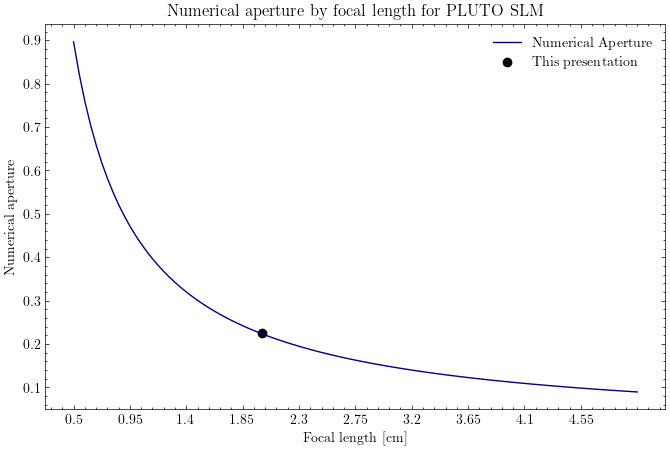

In [8]:
fig,ax = plt.subplots(1,1,figsize=(8,5))
d = 8.96e-3
val = np.max(np.where(distances < 0.04))

l0, = ax.plot(d/distances, label="Numerical Aperture", color='navy')
#l2 = ax.vlines(ymin=0, ymax=0.44, x=val+0.5, color='black', linestyle = 'dashed', label='This presentation')
ax.scatter(x=val +0.5, y=d/distances[val], color='black', label='This presentation')
integer = 10
ticklabels = [round(distances[i*integer]*50,3) for i in range(0,len(distances)//integer)]
ticks = [i*integer for i in range(0,len(distances)//integer)]
tkw = dict(size=4, width=1.5)
ax.set_xticks(ticks = ticks, labels = ticklabels)
ax.set_ylabel("Numerical aperture")
ax.set_xlabel("Focal length [cm]")
ax.legend(loc='upper right')
ax.set_title("Numerical aperture by focal length for PLUTO SLM")
fig.savefig("numerical_aperture_example.pdf")

In [9]:
print(distances)

[0.01   0.0109 0.0118 0.0127 0.0136 0.0145 0.0154 0.0163 0.0172 0.0181
 0.019  0.0199 0.0208 0.0217 0.0226 0.0235 0.0244 0.0253 0.0262 0.0271
 0.028  0.0289 0.0298 0.0307 0.0316 0.0325 0.0334 0.0343 0.0352 0.0361
 0.037  0.0379 0.0388 0.0397 0.0406 0.0415 0.0424 0.0433 0.0442 0.0451
 0.046  0.0469 0.0478 0.0487 0.0496 0.0505 0.0514 0.0523 0.0532 0.0541
 0.055  0.0559 0.0568 0.0577 0.0586 0.0595 0.0604 0.0613 0.0622 0.0631
 0.064  0.0649 0.0658 0.0667 0.0676 0.0685 0.0694 0.0703 0.0712 0.0721
 0.073  0.0739 0.0748 0.0757 0.0766 0.0775 0.0784 0.0793 0.0802 0.0811
 0.082  0.0829 0.0838 0.0847 0.0856 0.0865 0.0874 0.0883 0.0892 0.0901
 0.091  0.0919 0.0928 0.0937 0.0946 0.0955 0.0964 0.0973 0.0982 0.0991
 0.1   ]


In [10]:
colors = ["#9E68B2", "#2F2A39", "#42559A", "#5E7FA9", "#8683A0"]

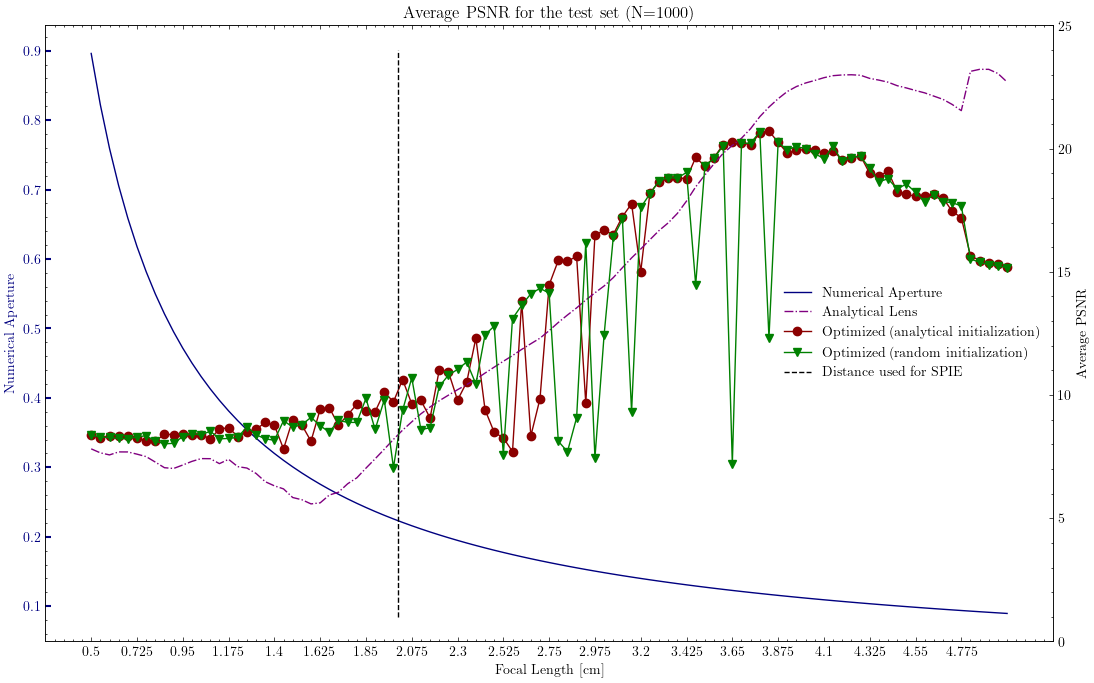

In [11]:
fig,ax = plt.subplots(1,1,figsize = (13,8))

l0, = ax.plot(d/distances, label="Numerical Aperture", color='navy')
twin1 = ax.twinx()
l1, = twin1.plot(lrn_psnr_lens, label = 'Optimized (analytical initialization)', marker='o', color = 'darkred')
l3, = twin1.plot(cooperative_psnr, label = 'Analytical Lens', linestyle = 'dashdot', color = 'purple')
l4, = twin1.plot(lrn_psnr_random, label = 'Optimized (random initialization)', marker = 'v', color = 'green')


integer = 5
ticklabels = [round(distances[i*integer]*50,3) for i in range(0,len(distances)//integer)]
ticks = [i*integer for i in range(0,len(distances)//integer)]

val = np.max(np.where(distances < 0.04))

l2 = twin1.vlines(ymin=1, ymax=24, x=val+0.5, color='black', linestyle = 'dashed', label='Distance used for SPIE')


tkw = dict(size=4, width=1.5)
twin1.set_xticks(ticks = ticks, labels = ticklabels)
twin1.set_xlabel("Propagation Distance [m]")
twin1.set_ylabel("Average PSNR")
twin1.set_title("Average PSNR for the test set (N=1000)")

#twin1.tick_params(axis='y', colors=l1.get_color(), **tkw)
ax.tick_params(axis='y', colors=l0.get_color(), **tkw)
ax.yaxis.label.set_color(l0.get_color())
#twin1.yaxis.label.set_color(l1.get_color())


ax.set_ylabel("Numerical Aperture")
ax.set_xlabel("Focal Length [cm]")

twin1.set_ylim(0,25)
ax.legend(loc='center right', handles = [l0,l3,l1,l4,l2])
fig.savefig("lens_comparison_psnr.pdf")

In [12]:
print(ticklabels)

[0.5, 0.725, 0.95, 1.175, 1.4, 1.625, 1.85, 2.075, 2.3, 2.525, 2.75, 2.975, 3.2, 3.425, 3.65, 3.875, 4.1, 4.325, 4.55, 4.775]


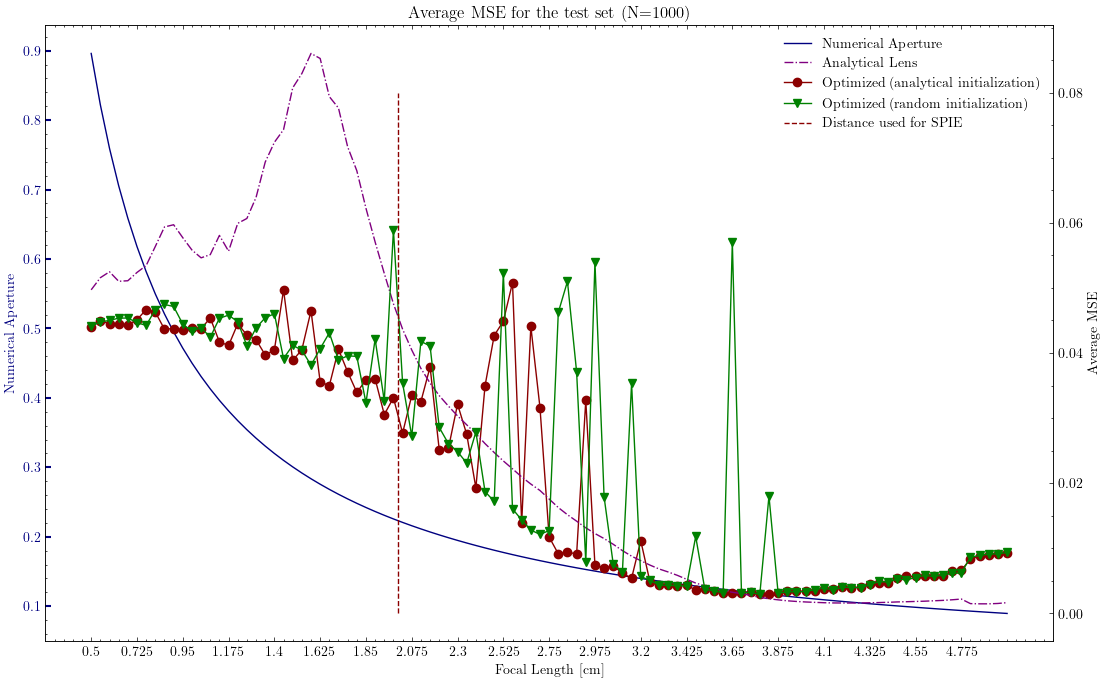

In [13]:
fig,ax = plt.subplots(1,1,figsize = (13,8))

l0, = ax.plot(d/distances, label="Numerical Aperture", color='navy')

twin1 = ax.twinx()
l1, = twin1.plot(lrn_mse_lens, label = 'Optimized (analytical initialization)', marker='o', color = 'darkred')
l3, = twin1.plot(cooperative_mse, label = 'Analytical Lens', linestyle = 'dashdot', color = 'purple')
l4, = twin1.plot(lrn_mse_random, label = 'Optimized (random initialization)', marker = 'v', color = 'green')
 

integer = 5
ticklabels = [round(distances[i*integer]*50,3) for i in range(0,len(distances)//integer)]
ticks = [i*integer for i in range(0,len(distances)//integer)]

val = np.max(np.where(distances < 0.04))

l2 = twin1.vlines(ymin=0, ymax=0.08, x=val+0.5, color='darkred', linestyle = 'dashed', label='Distance used for SPIE')


tkw = dict(size=4, width=1.5)
twin1.set_xticks(ticks = ticks, labels = ticklabels)
twin1.set_ylabel("Average MSE")
twin1.set_title("Average MSE for the test set (N=1000)")

#twin1.tick_params(axis='y', colors=l1.get_color(), **tkw)
ax.tick_params(axis='y', colors=l0.get_color(), **tkw)
ax.yaxis.label.set_color(l0.get_color())
#twin1.yaxis.label.set_color(l1.get_color())


ax.set_ylabel("Numerical Aperture")
ax.set_xlabel("Focal Length [cm]")

#twin1.set_ylim(0,25)
ax.legend(loc='upper right', handles = [l0,l3,l1,l4,l2])
fig.savefig("lens_comparison_mse.pdf")

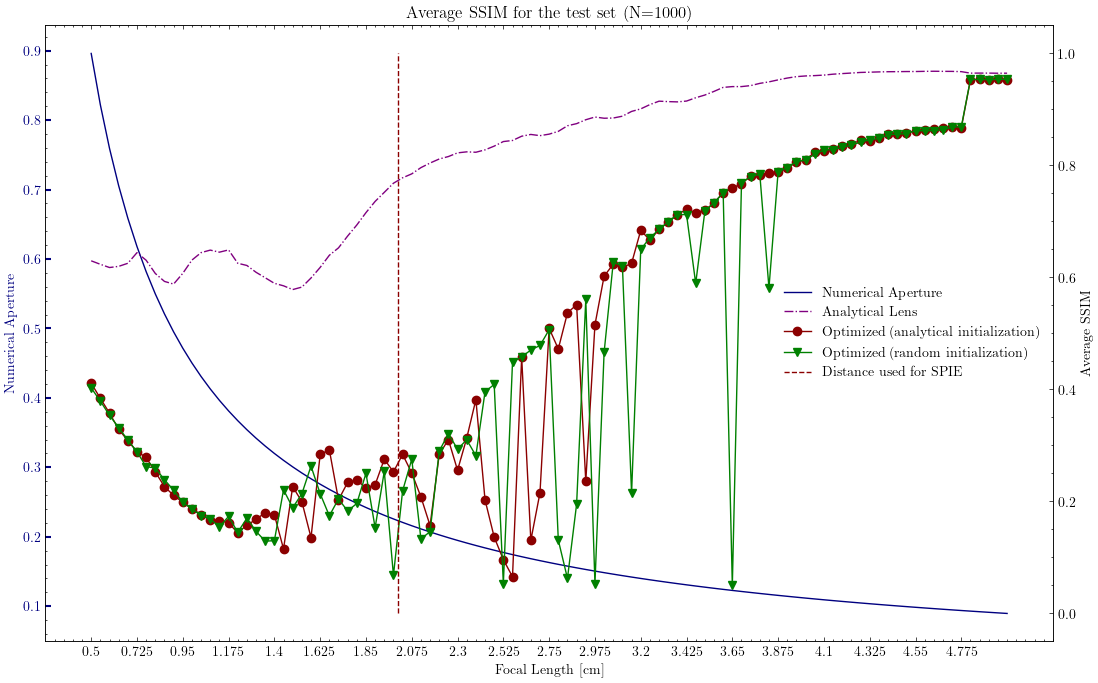

In [14]:
fig,ax = plt.subplots(1,1,figsize = (13,8))

l0, = ax.plot(d/distances, label="Numerical Aperture", color='navy')

twin1 = ax.twinx()
l1, = twin1.plot(lrn_ssim_lens, label = 'Optimized (analytical initialization)', marker='o', color = 'darkred')
l3, = twin1.plot(cooperative_ssim, label = 'Analytical Lens', linestyle = 'dashdot', color = 'purple')
l4, = twin1.plot(lrn_ssim_random, label = 'Optimized (random initialization)', marker = 'v', color = 'green')
 

integer = 5
ticklabels = [round(distances[i*integer]*50,3) for i in range(0,len(distances)//integer)]
ticks = [i*integer for i in range(0,len(distances)//integer)]

val = np.max(np.where(distances < 0.04))

l2 = twin1.vlines(ymin=0, ymax=1, x=val+0.5, color='darkred', linestyle = 'dashed', label='Distance used for SPIE')


tkw = dict(size=4, width=1.5)
twin1.set_xticks(ticks = ticks, labels = ticklabels)
twin1.set_ylabel("Average SSIM")
twin1.set_title("Average SSIM for the test set (N=1000)")

#twin1.tick_params(axis='y', colors=l1.get_color(), **tkw)
ax.tick_params(axis='y', colors=l0.get_color(), **tkw)
ax.yaxis.label.set_color(l0.get_color())
#twin1.yaxis.label.set_color(l1.get_color())


ax.set_ylabel("Numerical Aperture")
ax.set_xlabel("Focal Length [cm]")

#twin1.set_ylim(0,25)
ax.legend(loc='center right', handles = [l0,l3,l1,l4,l2])
fig.savefig("lens_comparison_ssim.pdf")

## Classifier stats

In [15]:
f1_analytical = {}
precision_analytical = {}
recall_analytical = {}
accuracy_analytical = {}

for f in tqdm(cooperative_analyticalLrn_folders):
    files = os.listdir(os.path.join(path_cooperative, 'analyticalLensInit', f))
    distance = f.split('_')[-1]
    for fi in files:
        if '.pt' in fi:  
            data = torch.load(os.path.join(path_cooperative, 'analyticalLensInit', f, fi))
            classifier_data = data['classifier']
            f1_analytical[distance] = classifier_data['f1']
            precision_analytical[distance] = classifier_data['prec']
            recall_analytical[distance] = classifier_data['rec']
            accuracy_analytical[distance] = classifier_data['acc']
f1_analytical = [f1_analytical[i] for i in f1_analytical]
recall_analytical = [recall_analytical[i] for i in recall_analytical]
precision_analytical = [precision_analytical[i] for i in precision_analytical]
accuracy_analytical = [accuracy_analytical[i] for i in accuracy_analytical]


print("Average analytical lens Recall : {:.3f} , STD : {:.3f}".format(np.mean(recall_analytical), np.std(recall_analytical)))
print("Average analytical lens Precision : {:.3f} , STD : {:.3f}".format(np.mean(precision_analytical), np.std(precision_analytical)))
print("Average analytical lens Accuracy : {:.3f} , STD : {:.3f}".format(np.mean(accuracy_analytical), np.std(accuracy_analytical)))
print("Average analytical lens F1 : {:.3f} , STD : {:.3f}".format(np.mean(f1_analytical), np.std(f1_analytical)))


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 101/101 [00:13<00:00,  7.47it/s]

Average analytical lens Recall : 0.795 , STD : 0.274
Average analytical lens Precision : 0.795 , STD : 0.274
Average analytical lens Accuracy : 0.795 , STD : 0.274
Average analytical lens F1 : 0.795 , STD : 0.274


In [16]:
f1_analytical_optim = {}
precision_analytical_optim = {}
recall_analytical_optim = {}
accuracy_analytical_optim = {}

for f in tqdm(cooperative_analyticalLrnOptim_folders):
    files = os.listdir(os.path.join(path_cooperative, 'analyticalLensInit_optimizable', f))
    distance = f.split('_')[-1]
    for fi in files:
        if '.pt' in fi:  
            data = torch.load(os.path.join(path_cooperative, 'analyticalLensInit_optimizable', f, fi))
            classifier_data = data['classifier']
            f1_analytical_optim[distance] = classifier_data['f1']
            precision_analytical_optim[distance] = classifier_data['prec']
            recall_analytical_optim[distance] = classifier_data['rec']
            accuracy_analytical_optim[distance] = classifier_data['acc']
            
f1_analytical_optim = [f1_analytical_optim[i] for i in f1_analytical_optim]
recall_analytical_optim = [recall_analytical_optim[i] for i in recall_analytical_optim]
precision_analytical_optim = [precision_analytical_optim[i] for i in precision_analytical_optim]
accuracy_analytical_optim = [accuracy_analytical_optim[i] for i in accuracy_analytical_optim]


print("Average optimized analytical lens Recall : {:.3f} , STD : {:.3f}".format(np.mean(recall_analytical_optim), np.std(recall_analytical_optim)))
print("Average optimized analytical lens Precision : {:.3f} , STD : {:.3f}".format(np.mean(precision_analytical_optim), np.std(precision_analytical_optim)))
print("Average optimized analytical lens Accuracy : {:.3f} , STD : {:.3f}".format(np.mean(accuracy_analytical_optim), np.std(accuracy_analytical_optim)))
print("Average optimized analytical lens F1 : {:.3f} , STD : {:.3f}".format(np.mean(f1_analytical_optim), np.std(f1_analytical_optim)))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 101/101 [00:13<00:00,  7.46it/s]

Average optimized analytical lens Recall : 0.946 , STD : 0.077
Average optimized analytical lens Precision : 0.946 , STD : 0.077
Average optimized analytical lens Accuracy : 0.946 , STD : 0.077
Average optimized analytical lens F1 : 0.946 , STD : 0.077


In [17]:
f1_random_optim = {}
precision_random_optim = {}
recall_random_optim = {}
accuracy_random_optim = {}

for f in tqdm(cooperative_randomLrnOptim_folders):
    files = os.listdir(os.path.join(path_cooperative, 'randomLensInit_optimizable', f))
    distance = f.split('_')[-1]
    for fi in files:
        if '.pt' in fi:  
            data = torch.load(os.path.join(path_cooperative, 'randomLensInit_optimizable', f, fi))
            classifier_data = data['classifier']
            f1_random_optim[distance] = classifier_data['f1']
            precision_random_optim[distance] = classifier_data['prec']
            recall_random_optim[distance] = classifier_data['rec']
            accuracy_random_optim[distance] = classifier_data['acc']
f1_random_optim = [f1_random_optim[i] for i in f1_random_optim]
recall_random_optim = [recall_random_optim[i] for i in recall_random_optim]
precision_random_optim = [precision_random_optim[i] for i in precision_random_optim]
accuracy_random_optim = [accuracy_random_optim[i] for i in accuracy_random_optim]


print("Average optimized random lens Recall : {:.3f} , STD : {:.3f}".format(np.mean(recall_random_optim), np.std(recall_random_optim)))
print("Average optimized random lens Precision : {:.3f} , STD : {:.3f}".format(np.mean(precision_random_optim), np.std(precision_random_optim)))
print("Average optimized random lens Accuracy : {:.3f} , STD : {:.3f}".format(np.mean(accuracy_random_optim), np.std(accuracy_random_optim)))
print("Average optimized random lens F1 : {:.3f} , STD : {:.3f}".format(np.mean(f1_random_optim), np.std(f1_random_optim)))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 101/101 [00:13<00:00,  7.47it/s]

Average optimized random lens Recall : 0.858 , STD : 0.163
Average optimized random lens Precision : 0.858 , STD : 0.163
Average optimized random lens Accuracy : 0.858 , STD : 0.163
Average optimized random lens F1 : 0.858 , STD : 0.163


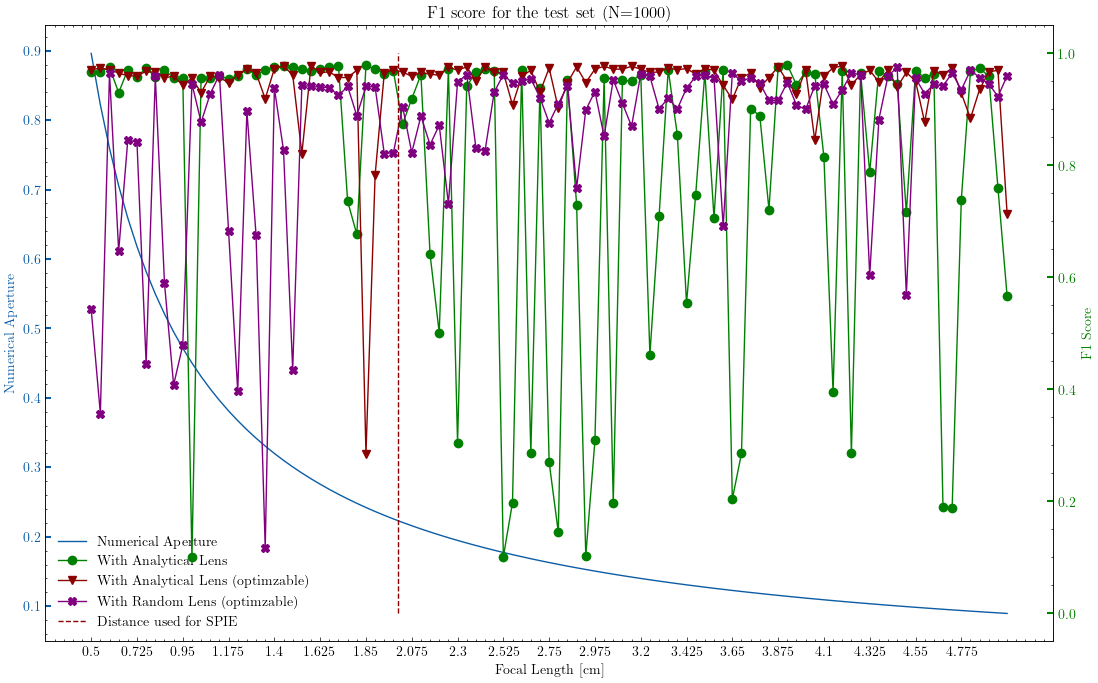

In [18]:
fig,ax = plt.subplots(1,1,figsize = (13,8))

l0, = ax.plot(d/distances, label="Numerical Aperture")

twin1 = ax.twinx()
l1, = twin1.plot(f1_analytical, label = 'With Analytical Lens', marker='o', color='green')
l3, = twin1.plot(f1_analytical_optim, label = 'With Analytical Lens (optimzable)', marker='v', color='darkred')
l4, = twin1.plot(f1_random_optim, label = 'With Random Lens (optimzable)', marker='X', color='purple')


integer = 5
ticklabels = [round(distances[i*integer]*50,3) for i in range(0,len(distances)//integer)]
ticks = [i*integer for i in range(0,len(distances)//integer)]

#val = np.max(np.where(distances < 0.04))

l2 = twin1.vlines(ymin=0, ymax=1, x=val+0.5, color='darkred', linestyle = 'dashed', label='Distance used for SPIE')


tkw = dict(size=4, width=1.5)
twin1.set_xticks(ticks = ticks, labels = ticklabels)
twin1.set_ylabel("F1 Score")
twin1.set_title("F1 score for the test set (N=1000)")
twin1.tick_params(axis='y', colors=l1.get_color(), **tkw)
ax.tick_params(axis='y', colors=l0.get_color(), **tkw)
ax.yaxis.label.set_color(l0.get_color())
twin1.yaxis.label.set_color(l1.get_color())


ax.set_ylabel("Numerical Aperture")
ax.set_xlabel("Focal Length [cm]")

#twin1.set_ylim(0,25)
ax.legend(loc='lower left', handles = [l0,l1,l3,l4,l2,])
fig.savefig("f1score_optimzedLenses.pdf")

## Classifiers after learning lenses

In [19]:
f1_trainedAnalytical = {}
precision_trainedAnalytical = {}
recall_trainedAnalytical= {}
accuracy_trainedAnalytical= {}

for f in tqdm(cooperative_trainedLrnLens_folders):
    files = os.listdir(os.path.join(path_cooperative, 'trainedLrn_lensInit', f))
    distance = f.split('_')[-1]
    for fi in files:
        if '.pt' in fi:  
            data = torch.load(os.path.join(path_cooperative, 'trainedLrn_lensInit', f, fi))
            classifier_data = data['classifier']
            f1_trainedAnalytical[distance] = classifier_data['f1']
            precision_trainedAnalytical[distance] = classifier_data['prec']
            recall_trainedAnalytical[distance] = classifier_data['rec']
            accuracy_trainedAnalytical[distance] = classifier_data['acc']
            
f1_trainedAnalytical= [f1_trainedAnalytical[i] for i in f1_trainedAnalytical]
recall_trainedAnalytical = [recall_trainedAnalytical[i] for i in recall_trainedAnalytical]
precision_trainedAnalytical = [precision_trainedAnalytical[i] for i in precision_trainedAnalytical]
accuracy_trainedAnalytical = [accuracy_trainedAnalytical[i] for i in accuracy_trainedAnalytical]


print("Average trained analytical lens Recall : {:.3f} , STD : {:.3f}".format(np.mean(recall_trainedAnalytical), np.std(recall_trainedAnalytical)))
print("Average trained analytical lens Precision : {:.3f} , STD : {:.3f}".format(np.mean(precision_trainedAnalytical), np.std(precision_trainedAnalytical)))
print("Average trained analytical lens Accuracy : {:.3f} , STD : {:.3f}".format(np.mean(accuracy_trainedAnalytical), np.std(accuracy_trainedAnalytical)))
print("Average trained analytical lens F1 : {:.3f} , STD : {:.3f}".format(np.mean(f1_trainedAnalytical), np.std(f1_trainedAnalytical)))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 101/101 [00:13<00:00,  7.30it/s]

Average trained analytical lens Recall : 0.900 , STD : 0.095
Average trained analytical lens Precision : 0.900 , STD : 0.095
Average trained analytical lens Accuracy : 0.900 , STD : 0.095
Average trained analytical lens F1 : 0.900 , STD : 0.095


In [20]:
f1_trainedRandom = {}
precision_trainedRandom = {}
recall_trainedRandom = {}
accuracy_trainedRandom = {}

for f in tqdm(cooperative_trainedLrnRandom_folders):
    files = os.listdir(os.path.join(path_cooperative, 'trainedLrn_randomInit', f))
    distance = f.split('_')[-1]
    for fi in files:
        if '.pt' in fi:  
            data = torch.load(os.path.join(path_cooperative, 'trainedLrn_randomInit', f, fi))
            classifier_data = data['classifier']
            f1_trainedRandom[distance] = classifier_data['f1']
            precision_trainedRandom[distance] = classifier_data['prec']
            recall_trainedRandom[distance] = classifier_data['rec']
            accuracy_trainedRandom[distance] = classifier_data['acc']
            
f1_trainedRandom= [f1_trainedRandom[i] for i in f1_trainedRandom]
recall_trainedRandom = [recall_trainedRandom[i] for i in recall_trainedRandom]
precision_trainedRandom = [precision_trainedRandom[i] for i in precision_trainedRandom]
accuracy_trainedRandom = [accuracy_trainedRandom[i] for i in accuracy_trainedRandom]


print("Average trained random lens Recall : {:.3f} , STD : {:.3f}".format(np.mean(recall_trainedRandom), np.std(recall_trainedRandom)))
print("Average trained random lens Precision : {:.3f} , STD : {:.3f}".format(np.mean(precision_trainedRandom), np.std(precision_trainedRandom)))
print("Average trained random lens Accuracy : {:.3f} , STD : {:.3f}".format(np.mean(accuracy_trainedRandom), np.std(accuracy_trainedRandom)))
print("Average trained random lens F1 : {:.3f} , STD : {:.3f}".format(np.mean(f1_trainedRandom), np.std(f1_trainedRandom)))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 101/101 [00:13<00:00,  7.27it/s]

Average trained random lens Recall : 0.902 , STD : 0.095
Average trained random lens Precision : 0.902 , STD : 0.095
Average trained random lens Accuracy : 0.902 , STD : 0.095
Average trained random lens F1 : 0.902 , STD : 0.095


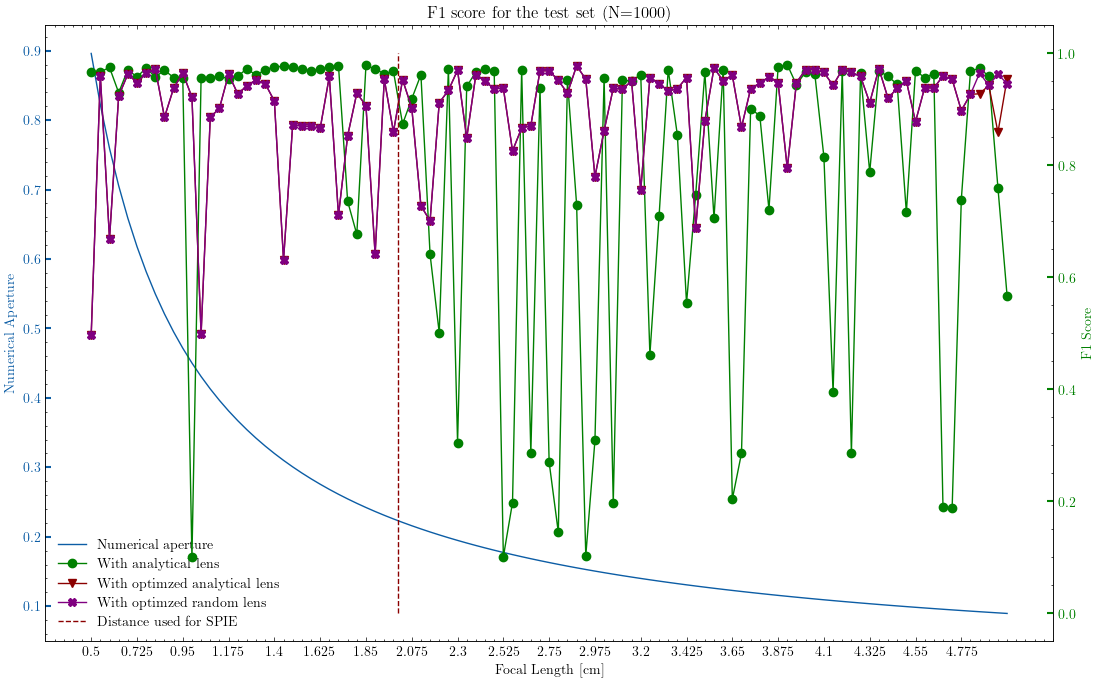

In [21]:
fig,ax = plt.subplots(1,1,figsize = (13,8))

l0, = ax.plot(d/distances, label="Numerical aperture")

twin1 = ax.twinx()
l1, = twin1.plot(f1_analytical, label = 'With analytical lens', marker='o', color='green')
l3, = twin1.plot(f1_trainedAnalytical, label = 'With optimzed analytical lens', marker='v', color='darkred')
l4, = twin1.plot(f1_trainedRandom, label = 'With optimzed random lens', marker='X', color='purple')


integer = 5
ticklabels = [round(distances[i*integer]*50,3) for i in range(0,len(distances)//integer)]
ticks = [i*integer for i in range(0,len(distances)//integer)]

val = np.max(np.where(distances < 0.04))

l2 = twin1.vlines(ymin=0, ymax=1, x=val+0.5, color='darkred', linestyle = 'dashed', label='Distance used for SPIE')


tkw = dict(size=4, width=1.5)
twin1.set_xticks(ticks = ticks, labels = ticklabels)
twin1.set_ylabel("F1 Score")
twin1.set_title("F1 score for the test set (N=1000)")
twin1.tick_params(axis='y', colors=l1.get_color(), **tkw)
ax.tick_params(axis='y', colors=l0.get_color(), **tkw)
ax.yaxis.label.set_color(l0.get_color())
twin1.yaxis.label.set_color(l1.get_color())


ax.set_ylabel("Numerical Aperture")
ax.set_xlabel("Focal Length [cm]")

#twin1.set_ylim(0,25)
ax.legend(loc='lower left', handles = [l0,l1,l3,l4,l2,])
fig.savefig("learnedLenses_vs_analytical.pdf")

## Classifier optimized lens performance

In [22]:
cooperative_averages_lens = {}
for f in tqdm(cooperative_analyticalLrnOptim_folders):
    files = os.listdir(os.path.join(path_cooperative, 'analyticalLensInit_optimizable', f))
    distance = f.split('_')[-1]
    mse_vals = []
    psnr_vals = []
    ssim_vals = []
    for fi in files:
        if '.pt' in fi:
            data = torch.load(os.path.join(path_cooperative, 'analyticalLensInit_optimizable', f, fi))['lrn']
            for d_ in data:
                mse_vals.append(d_['mse'])
                psnr_vals.append(d_['psnr'])
                ssim_vals.append(d_['ssim'])
    average_mse = np.mean(np.asarray(mse_vals))
    average_psnr = np.mean(np.asarray(psnr_vals))
    average_ssim = np.mean(np.asarray(ssim_vals))
    cooperative_averages_lens[distance] = {'mse':average_mse, 'psnr':average_psnr, 'ssim':average_ssim}
cooperative_mse_lens = [cooperative_averages_lens[i]['mse'] for i in cooperative_averages_lens]
cooperative_psnr_lens = [cooperative_averages_lens[i]['psnr'] for i in cooperative_averages_lens]
cooperative_ssim_lens = [cooperative_averages_lens[i]['ssim'] for i in cooperative_averages_lens]


print("Cooperative lens average MSE : {:.3f} , STD : {:.3f}".format(np.mean(cooperative_mse_lens), np.std(cooperative_mse_lens)))
print("Cooperative lens average PSNR : {:.3f} , STD : {:.3f}".format(np.mean(cooperative_psnr_lens), np.std(cooperative_psnr_lens)))
print("Cooperative lens average SSIM : {:.3f} , STD : {:.3f}".format(np.mean(cooperative_ssim_lens), np.std(cooperative_ssim_lens)))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 101/101 [00:14<00:00,  6.86it/s]

Cooperative lens average MSE : 0.032 , STD : 0.025
Cooperative lens average PSNR : 12.696 , STD : 6.086
Cooperative lens average SSIM : 0.786 , STD : 0.108


In [23]:
cooperative_averages_random = {}
for f in tqdm(cooperative_randomLrnOptim_folders):
    files = os.listdir(os.path.join(path_cooperative, 'randomLensInit_optimizable', f))
    distance = f.split('_')[-1]
    mse_vals = []
    psnr_vals = []
    ssim_vals = []
    for fi in files:
        if '.pt' in fi:
            data = torch.load(os.path.join(path_cooperative, 'randomLensInit_optimizable', f, fi))['lrn']
            for d_ in data:
                mse_vals.append(d_['mse'])
                psnr_vals.append(d_['psnr'])
                ssim_vals.append(d_['ssim'])
    average_mse = np.mean(np.asarray(mse_vals))
    average_psnr = np.mean(np.asarray(psnr_vals))
    average_ssim = np.mean(np.asarray(ssim_vals))
    cooperative_averages_random[distance] = {'mse':average_mse, 'psnr':average_psnr, 'ssim':average_ssim}
cooperative_mse_random = [cooperative_averages_random[i]['mse'] for i in cooperative_averages_random]
cooperative_psnr_random = [cooperative_averages_random[i]['psnr'] for i in cooperative_averages_random]
cooperative_ssim_random = [cooperative_averages_random[i]['ssim'] for i in cooperative_averages_random]

print("Cooperative random average MSE : {:.3f} , STD : {:.3f}".format(np.mean(cooperative_mse_random), np.std(cooperative_mse_random)))
print("Cooperative random average PSNR : {:.3f} , STD : {:.3f}".format(np.mean(cooperative_psnr_random), np.std(cooperative_psnr_random)))
print("Cooperative random average SSIM : {:.3f} , STD : {:.3f}".format(np.mean(cooperative_ssim_random), np.std(cooperative_ssim_random)))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 101/101 [00:14<00:00,  6.98it/s]

Cooperative random average MSE : 0.053 , STD : 0.009
Cooperative random average PSNR : 7.647 , STD : 0.703
Cooperative random average SSIM : 0.569 , STD : 0.053


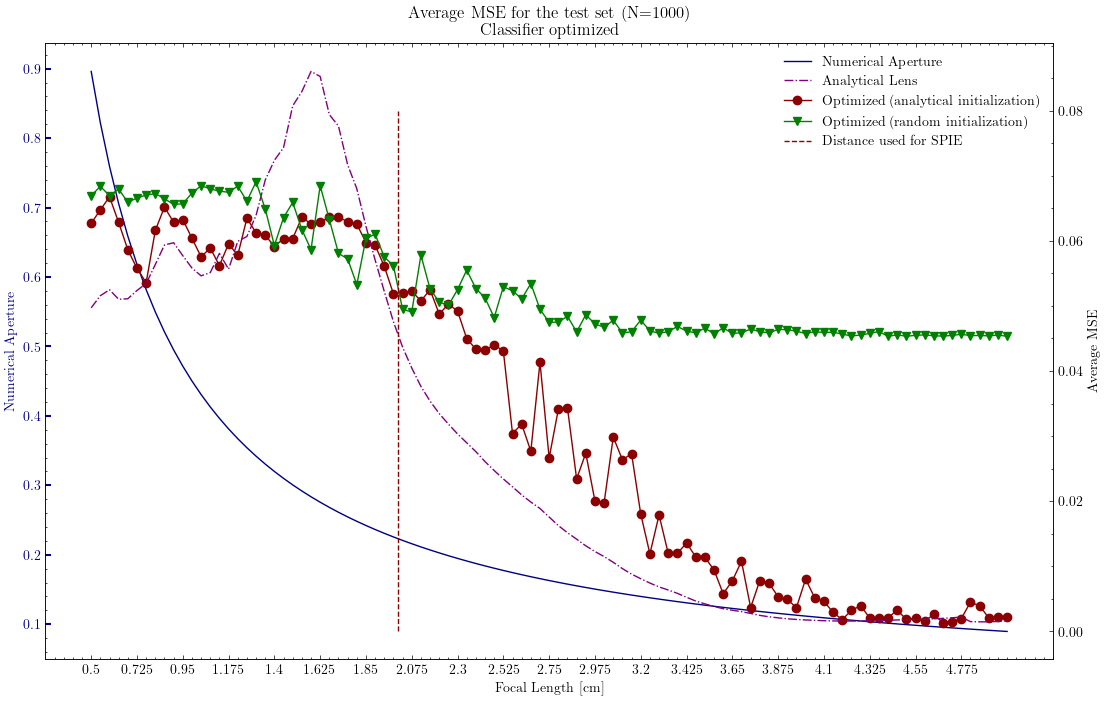

In [24]:
fig,ax = plt.subplots(1,1,figsize = (13,8))

l0, = ax.plot(d/distances, label="Numerical Aperture", color='navy')

twin1 = ax.twinx()
l1, = twin1.plot(cooperative_mse_lens, label = 'Optimized (analytical initialization)', marker='o', color = 'darkred')
l3, = twin1.plot(cooperative_mse, label = 'Analytical Lens', linestyle = 'dashdot', color = 'purple')
l4, = twin1.plot(cooperative_mse_random, label = 'Optimized (random initialization)', marker = 'v', color = 'green')
 

integer = 5
ticklabels = [round(distances[i*integer]*50,3) for i in range(0,len(distances)//integer)]
ticks = [i*integer for i in range(0,len(distances)//integer)]

val = np.max(np.where(distances < 0.04))

l2 = twin1.vlines(ymin=0, ymax=0.08, x=val+0.5, color='darkred', linestyle = 'dashed', label='Distance used for SPIE')


tkw = dict(size=4, width=1.5)
twin1.set_xticks(ticks = ticks, labels = ticklabels)
twin1.set_ylabel("Average MSE")
twin1.set_title("Average MSE for the test set (N=1000)\n Classifier optimized")

#twin1.tick_params(axis='y', colors=l1.get_color(), **tkw)
ax.tick_params(axis='y', colors=l0.get_color(), **tkw)
ax.yaxis.label.set_color(l0.get_color())
#twin1.yaxis.label.set_color(l1.get_color())


ax.set_ylabel("Numerical Aperture")
ax.set_xlabel("Focal Length [cm]")

#twin1.set_ylim(0,25)
ax.legend(loc='upper right', handles = [l0,l3,l1,l4,l2])
fig.savefig("classifier_optimized_lenses_mse.pdf")

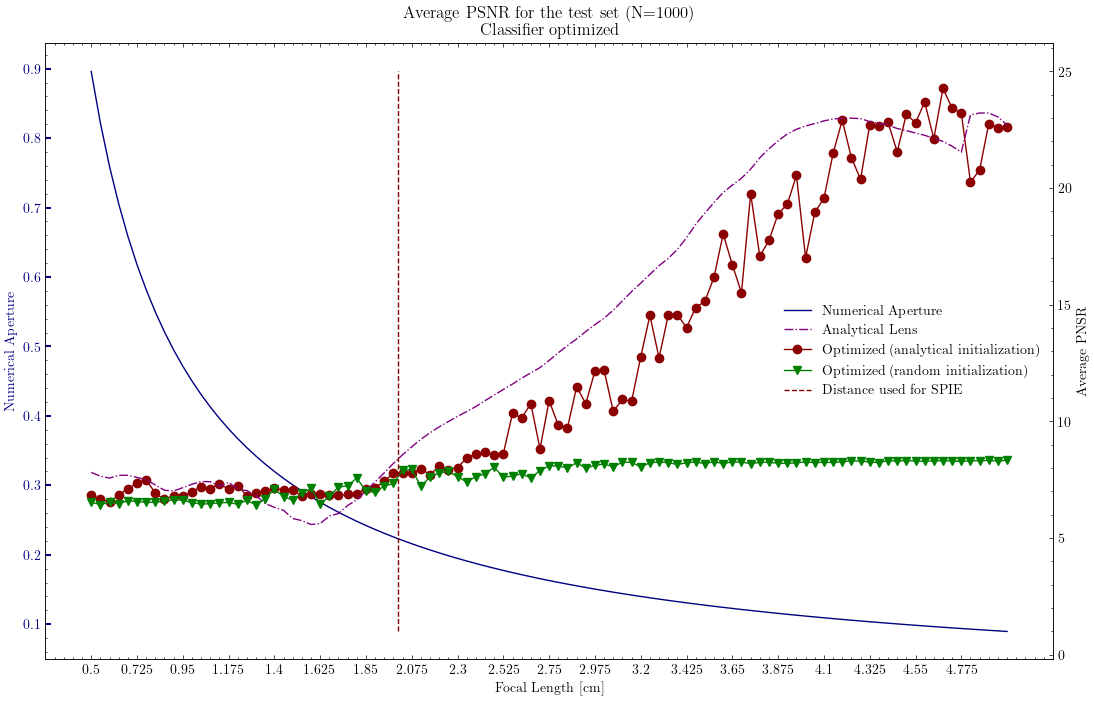

In [25]:
fig,ax = plt.subplots(1,1,figsize = (13,8))

l0, = ax.plot(d/distances, label="Numerical Aperture", color='navy')

twin1 = ax.twinx()
l1, = twin1.plot(cooperative_psnr_lens, label = 'Optimized (analytical initialization)', marker='o', color = 'darkred')
l3, = twin1.plot(cooperative_psnr, label = 'Analytical Lens', linestyle = 'dashdot', color = 'purple')
l4, = twin1.plot(cooperative_psnr_random, label = 'Optimized (random initialization)', marker = 'v', color = 'green')
 

integer = 5
ticklabels = [round(distances[i*integer]*50,3) for i in range(0,len(distances)//integer)]
ticks = [i*integer for i in range(0,len(distances)//integer)]

val = np.max(np.where(distances < 0.04))

l2 = twin1.vlines(ymin=1, ymax=25, x=val+0.5, color='darkred', linestyle = 'dashed', label='Distance used for SPIE')


tkw = dict(size=4, width=1.5)
twin1.set_xticks(ticks = ticks, labels = ticklabels)
twin1.set_ylabel("Average PNSR")
twin1.set_title("Average PSNR for the test set (N=1000)\n Classifier optimized")

#twin1.tick_params(axis='y', colors=l1.get_color(), **tkw)
ax.tick_params(axis='y', colors=l0.get_color(), **tkw)
ax.yaxis.label.set_color(l0.get_color())
#twin1.yaxis.label.set_color(l1.get_color())


ax.set_ylabel("Numerical Aperture")
ax.set_xlabel("Focal Length [cm]")

#twin1.set_ylim(0,25)
ax.legend(loc='center right', handles = [l0,l3,l1,l4,l2])
fig.savefig("classifier_optimized_lenses_psnr.pdf")

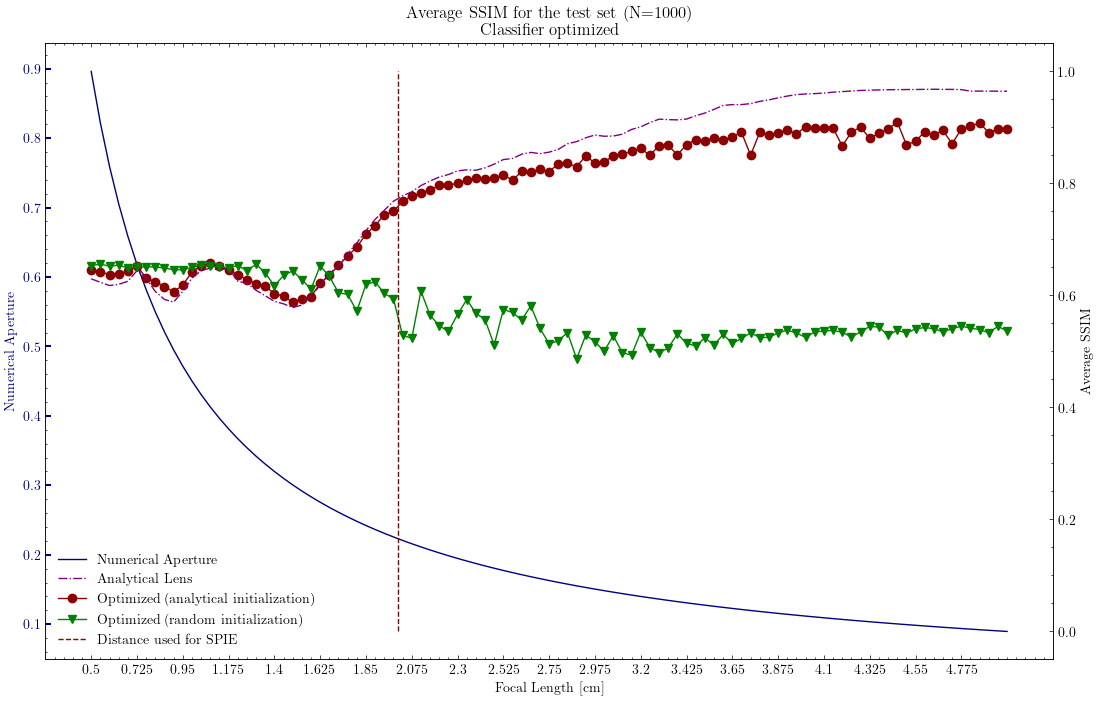

In [26]:
fig,ax = plt.subplots(1,1,figsize = (13,8))

l0, = ax.plot(d/distances, label="Numerical Aperture", color='navy')

twin1 = ax.twinx()
l1, = twin1.plot(cooperative_ssim_lens, label = 'Optimized (analytical initialization)', marker='o', color = 'darkred')
l3, = twin1.plot(cooperative_ssim, label = 'Analytical Lens', linestyle = 'dashdot', color = 'purple')
l4, = twin1.plot(cooperative_ssim_random, label = 'Optimized (random initialization)', marker = 'v', color = 'green')
 

integer = 5
ticklabels = [round(distances[i*integer]*50,3) for i in range(0,len(distances)//integer)]
ticks = [i*integer for i in range(0,len(distances)//integer)]

val = np.max(np.where(distances < 0.04))

l2 = twin1.vlines(ymin=0, ymax=1, x=val+0.5, color='darkred', linestyle = 'dashed', label='Distance used for SPIE')


tkw = dict(size=4, width=1.5)
twin1.set_xticks(ticks = ticks, labels = ticklabels)
twin1.set_ylabel("Average SSIM")
twin1.set_title("Average SSIM for the test set (N=1000)\n Classifier optimized")

#twin1.tick_params(axis='y', colors=l1.get_color(), **tkw)
ax.tick_params(axis='y', colors=l0.get_color(), **tkw)
ax.yaxis.label.set_color(l0.get_color())
#twin1.yaxis.label.set_color(l1.get_color())


ax.set_ylabel("Numerical Aperture")
ax.set_xlabel("Focal Length [cm]")

#twin1.set_ylim(0,25)
ax.legend(loc='lower left', handles = [l0,l3,l1,l4,l2])
fig.savefig("classifier_optimized_lenses_ssim.pdf")

---
---
---
---

In [27]:
distances

array([0.01  , 0.0109, 0.0118, 0.0127, 0.0136, 0.0145, 0.0154, 0.0163,
       0.0172, 0.0181, 0.019 , 0.0199, 0.0208, 0.0217, 0.0226, 0.0235,
       0.0244, 0.0253, 0.0262, 0.0271, 0.028 , 0.0289, 0.0298, 0.0307,
       0.0316, 0.0325, 0.0334, 0.0343, 0.0352, 0.0361, 0.037 , 0.0379,
       0.0388, 0.0397, 0.0406, 0.0415, 0.0424, 0.0433, 0.0442, 0.0451,
       0.046 , 0.0469, 0.0478, 0.0487, 0.0496, 0.0505, 0.0514, 0.0523,
       0.0532, 0.0541, 0.055 , 0.0559, 0.0568, 0.0577, 0.0586, 0.0595,
       0.0604, 0.0613, 0.0622, 0.0631, 0.064 , 0.0649, 0.0658, 0.0667,
       0.0676, 0.0685, 0.0694, 0.0703, 0.0712, 0.0721, 0.073 , 0.0739,
       0.0748, 0.0757, 0.0766, 0.0775, 0.0784, 0.0793, 0.0802, 0.0811,
       0.082 , 0.0829, 0.0838, 0.0847, 0.0856, 0.0865, 0.0874, 0.0883,
       0.0892, 0.0901, 0.091 , 0.0919, 0.0928, 0.0937, 0.0946, 0.0955,
       0.0964, 0.0973, 0.0982, 0.0991, 0.1   ])

NameError: name 'ax2_ticklabels' is not defined

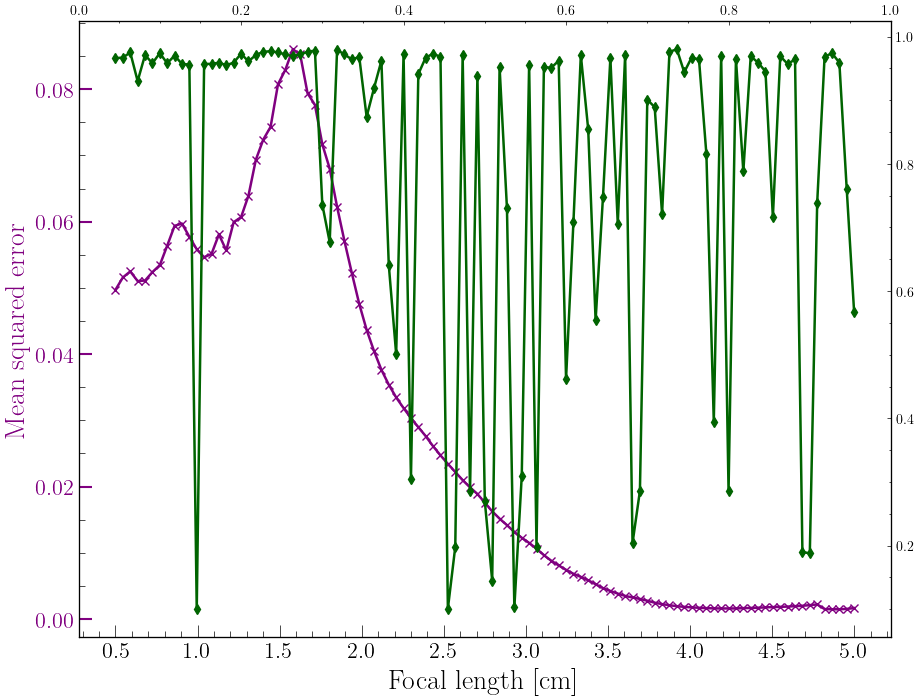

In [28]:
import matplotlib
matplotlib.rcParams['axes.linewidth'] = 0.8
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.labeltop'] = False

linewidth = 1.8
markersize = 5

fig,ax = plt.subplots(1,1,figsize = (13,8))
fig.subplots_adjust(right=0.75)

twin1 = ax.twinx()
# twin2 = ax.twinx()

l0, = ax.plot(distances, cooperative_mse, label = 'MSE image comparison', marker = 'x', linestyle = '-', color = 'purple', linewidth= linewidth, markersize=markersize+1.4)
# l0, = ax.plot(distances, cooperative_mse, label = 'MSE image comparison', linestyle = '-', color = 'plum', linewidth= linewidth)
# ax.scatter(distances, cooperative_mse, marker = 'v', color = 'purple', zorder=10)

l1, = twin1.plot(distances, f1_analytical, label = 'F1 image classification', marker='d', color='darkgreen', linewidth = linewidth, markersize=markersize)
# l1, = twin1.plot(distances, f1_analytical, label = 'F1 image classification', color='limegreen', linewidth = linewidth)
# twin1.scatter(distances, f1_analytical, marker = 'o', color = 'darkgreen', zorder=10)

# l2, = twin2.plot(distances, d/distances, label="Numerical aperture", color='navy', linewidth = linewidth)

#integer = 10
#ticklabels = [round(distances[i*integer]*50,2) for i in range(0,len(distances)//integer)]
#ticklabels.append(5.00)

#ticks = [i*integer for i in range(0,len(distances)//integer)]
#ticks.append(100)

ticklabels = [0.5 * i for i in range(1,11)]
ticks = [i/100 for i in range(1,(len(distances)//10)+1)]


val = np.max(np.where(distances < 0.04))


csfont = {'fontname':'Arial'}

tkw = dict(size=4, width=1.5)

fontsize_labels = 20

ax.set_xticks(ticks = ticks, labels = ticklabels, fontsize = 16)
ax.tick_params(axis='y', colors=l0.get_color(), labelsize = 16, **tkw)
ax.yaxis.label.set_color(l0.get_color())
ax.set_ylabel("Mean squared error", fontsize = fontsize_labels)
ax.set_xlabel("Focal length [cm]", fontsize = fontsize_labels)
ax.tick_params(which='minor', length=4)
ax.tick_params(which='major', length=9)

ax2 = ax.twiny()
na = np.round(d/distances)
ax_ticklabels = [np.round(d/t,2) for t in ticks]
ax2.set_xticks(ticks = ticks, labels = ax2_ticklabels, fontsize=16)
ax2.plot(distances, cooperative_mse, linestyle = '-', color = 'purple', linewidth= 0)
# ax2.plot(distances, cooperative_mse, label = 'MSE image comparison', linestyle = '-', color = 'plum', linewidth= linewidth)
# ax2.scatter(distances, cooperative_mse, marker = 'v', color = 'purple', zorder=10)

ax2.set_xlabel('Numerical Aperture', fontsize=fontsize_labels, labelpad=10)
ax2.tick_params(which='minor', length=4)
ax2.tick_params(which='major', length=9)

twin1.set_ylabel("F1 score", fontsize = fontsize_labels)
#twin1.set_title("F1 score for the test set (N=1000)")
twin1.tick_params(axis='y', colors=l1.get_color(), labelsize = 16, **tkw)
twin1.yaxis.label.set_color(l1.get_color())
#twin1.yaxis.set_ticks_position("left")
#twin1.yaxis.set_label_position("left")
#twin1.spines.left.set_position(("axes", -0.11))
twin1.tick_params(which='minor', length=4)
twin1.tick_params(which='major', length=9)

# twin2.set_ylabel("Numerical aperture", fontsize = fontsize_labels)
# twin2.tick_params(axis='y', colors=l2.get_color(), labelsize = 16, **tkw)
# twin2.yaxis.label.set_color(l2.get_color())
# twin2.tick_params(which='minor', length=4)
# twin2.tick_params(which='major', length=9)

ax.spines[['top']].set_visible(True)
twin1.spines[['top']].set_visible(True)
# twin2.spines[['top']].set_visible(True)

ax.set_ylim(0,0.09)
twin1.set_ylim(0,1)
# twin2.set_ylim(0,1)
ax.set_xlim(1/100-0.003, 10/100+0.003)
ax2.set_xlim(1/100-0.003, 10/100+0.003)

twin1.legend(loc='upper left', bbox_to_anchor=(0.145,0.18), handles = [l0,l1,], frameon=True, fontsize=14, framealpha=0.7, facecolor='white').set_zorder(2)

ax.arrow(4/100, 0.04, -0.15/100, 0, head_width = 0.002, head_length = 0.002, color='purple', width=0.0007)

ax.arrow(9.6/100, 0.04, 0.15/100, 0, head_width = 0.002, head_length = 0.002, color='darkgreen', width=0.0007)

fig.savefig("baseline_mse_f1_na_test4.pdf")

In [ ]:
plt.close('all')

In [ ]:
test = np.asarray([np.asarray(i) for i in f1_analytical])

In [ ]:
distances[np.where(test == np.min(test))]/2

In [ ]:
test2 = np.asarray([np.asarray(i) for i in cooperative_mse])
distances[np.where(test2 == np.max(test2))]/2
print(np.max(test2))

In [ ]:
print(np.min(f1_analytical))
print(np.where(f1_analytical == np.min(f1_analytical)))
print()

print(np.where(cooperative_mse == np.max(cooperative_mse)))
print()
print()


print(distances[11])
print(distances[24])
print(distances[24+13*1])
print(distances[24+13*2])
print(distances[24+13*3])
print(distances[24+13*4])
print(distances[24+13*5])
print(distances[-1])

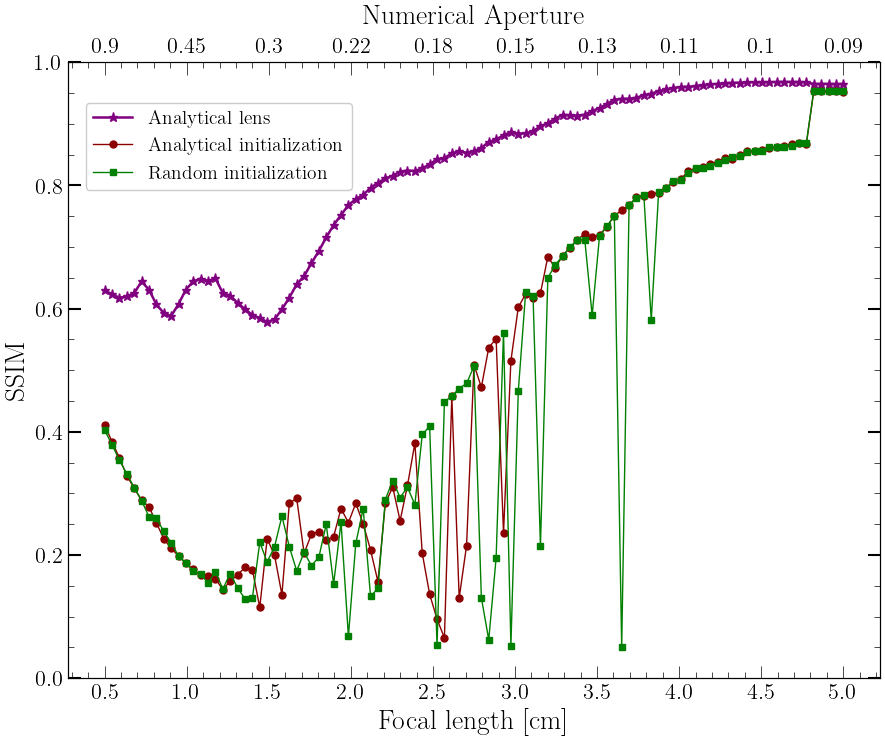

In [51]:
fig,ax = plt.subplots(1,1,figsize = (13,8))
fig.subplots_adjust(right=0.75)

#twin1 = ax.twinx()
#twin2 = ax.twinx()

markersize = 5

linewidth = 1.8
l0, = ax.plot(distances, cooperative_ssim, label = 'Analytical lens', marker = '*', linestyle = '-', color = 'purple', linewidth= linewidth, markersize=markersize+1.8)
l1, = ax.plot(distances, lrn_ssim_lens, label = 'Analytical initialization', marker='o', color = 'darkred', markersize=markersize)
l2, = ax.plot(distances, lrn_ssim_random, label = 'Random initialization', marker = 's', color = 'green', markersize=markersize)
#l3, = twin2.plot(distances, d/distances, label="Numerical aperture", color='navy', linewidth = linewidth)



integer = 5
#ticklabels = [round(distances[i*integer]*50,2) for i in range(0,len(distances)//integer)]
#ticks = [i*integer for i in range(0,len(distances)//integer)]
ticklabels = [0.5 * i for i in range(1,11)]
ticks = [i/100 for i in range(1,(len(distances)//10)+1)]
val = np.max(np.where(distances < 0.04))



tkw = dict(size=4, width=1.5)

fontsize_labels = 20

ax.set_xticks(ticks = ticks, labels = ticklabels, fontsize = 16)
ax.tick_params(axis='y', labelsize = 16, **tkw)
#ax.yaxis.label.set_color(l0.get_color())
ax.set_ylabel("SSIM", fontsize = fontsize_labels)
ax.set_xlabel("Focal length [cm]", fontsize = fontsize_labels)
ax.tick_params(which='minor', length=4)
ax.tick_params(which='major', length=9)
ax.set_ylim(0,1)
# twin1.set_ylabel("F1 score", fontsize = fontsize_labels)
# #twin1.set_title("F1 score for the test set (N=1000)")
# twin1.tick_params(axis='y', colors=l1.get_color(), labelsize = 11, **tkw)
# twin1.yaxis.label.set_color(l1.get_color())
# twin1.yaxis.set_ticks_position("left")
# twin1.yaxis.set_label_position("left")
# twin1.spines.left.set_position(("axes", -0.087))
ax2 = ax.twiny()
na = np.round(d/distances)
ax_ticklabels = [round(d/t,2) for t in ticks]
ax2.set_xticks(ticks = ticks, labels = ax_ticklabels, fontsize=16)
ax2.plot(distances, cooperative_mse, linestyle = '-', color = 'purple', linewidth= 0)
# ax2.plot(distances, cooperative_mse, label = 'MSE image comparison', linestyle = '-', color = 'plum', linewidth= linewidth)
# ax2.scatter(distances, cooperative_mse, marker = 'v', color = 'purple', zorder=10)

ax2.set_xlabel('Numerical Aperture', fontsize=fontsize_labels, labelpad=10)
ax2.tick_params(which='minor', length=4)
ax2.tick_params(which='major', length=9)

# twin2.set_ylabel("Numerical aperture", fontsize = fontsize_labels)
# twin2.tick_params(axis='y', colors=l3.get_color(), labelsize = 16, **tkw)
# twin2.yaxis.label.set_color(l3.get_color())
# twin2.tick_params(which='minor', length=4)
# twin2.tick_params(which='major', length=9)
# twin2.set_ylim(0,1)

#twin1.set_ylim(0,25)
ax.legend(loc='upper left', bbox_to_anchor=(0.01,0.95), handles = [l0,l1,l2], frameon=True, fontsize=14, framealpha=1)
fig.savefig("optimizedImages_ssim_na.pdf")

NameError: name 'ax2_ticklabels' is not defined

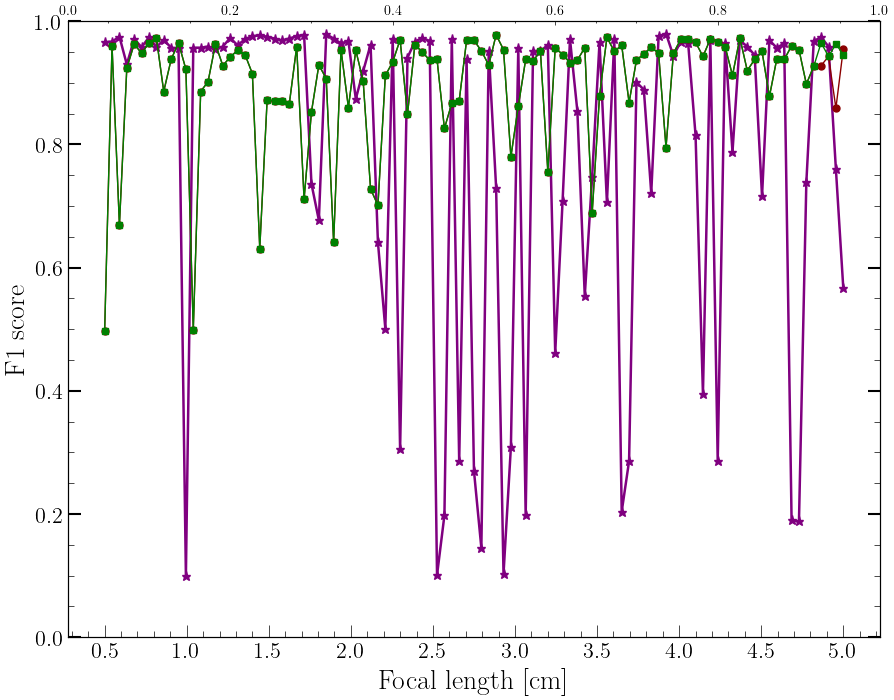

In [30]:
fig,ax = plt.subplots(1,1,figsize = (13,8))
fig.subplots_adjust(right=0.75)

#twin1 = ax.twinx()
# twin2 = ax.twinx()
markersize=5
linewidth = 1.8
l0, = ax.plot(distances, f1_analytical, label = 'Analytical lens', marker = '*', linestyle = '-', color = 'purple', linewidth= linewidth, markersize=markersize+1.8)
l1, = ax.plot(distances, f1_trainedAnalytical, label = 'Analytical initialization', marker='o', color = 'darkred', markersize=markersize)
l2, = ax.plot(distances, f1_trainedRandom, label = 'Random initialization', marker = 's', color = 'green', markersize=markersize)
# l3, = twin2.plot(distances, d/distances, label="Numerical aperture", color='navy', linewidth = linewidth)



#integer = 5
#ticklabels = [round(distances[i*integer]*50,2) for i in range(0,len(distances)//integer)]
#ticks = [i*integer for i in range(0,len(distances)//integer)]

ticklabels = [0.5 * i for i in range(1,11)]
ticks = [i/100 for i in range(1,(len(distances)//10)+1)]

val = np.max(np.where(distances < 0.04))



tkw = dict(size=4, width=1.5)

fontsize_labels = 20

ax.set_xticks(ticks = ticks, labels = ticklabels, fontsize = 16)
ax.tick_params(axis='y', labelsize = 16, **tkw)
ax.set_ylabel("F1 score", fontsize = fontsize_labels)
#ax.yaxis.label.set_color(l0.get_color())
#ax.set_ylabel("Mean squared error", fontsize = fontsize_labels)
ax.set_xlabel("Focal length [cm]", fontsize = fontsize_labels)
ax.tick_params(which='minor', length=4)
ax.tick_params(which='major', length=9)
ax.set_ylim(0,1)
# 
# #twin1.set_title("F1 score for the test set (N=1000)")
# twin1.tick_params(axis='y', colors=l1.get_color(), labelsize = 11, **tkw)
# twin1.yaxis.label.set_color(l1.get_color())
# twin1.yaxis.set_ticks_position("left")
# twin1.yaxis.set_label_position("left")
# twin1.spines.left.set_position(("axes", -0.087))


# twin2.set_ylabel("Numerical aperture", fontsize = fontsize_labels)
# twin2.tick_params(axis='y', colors=l3.get_color(), labelsize = 16, **tkw)
# twin2.yaxis.label.set_color(l3.get_color())
# twin2.tick_params(which='minor', length=4)
# twin2.tick_params(which='major', length=9)
# twin2.set_ylim(0,1)

ax2 = ax.twiny()
na = np.round(d/distances)
ax_ticklabels = [d/t for t in ticks]
ax2.set_xticks(ticks = ticks, labels = ax_ticklabels, fontsize=16)
ax2.plot(distances, f1_analytical, linestyle = '-', color = 'purple', linewidth=0)
# ax2.plot(distances, cooperative_mse, label = 'MSE image comparison', linestyle = '-', color = 'plum', linewidth= linewidth)
# ax2.scatter(distances, cooperative_mse, marker = 'v', color = 'purple', zorder=10)

ax2.set_xlabel('Numerical Aperture', fontsize=fontsize_labels, labelpad=10)
ax2.tick_params(which='minor', length=4)
ax2.tick_params(which='major', length=9)

#twin1.set_ylim(0,25)
ax.legend(loc='upper left', bbox_to_anchor=(0.01,0.23), handles = [l0,l1,l2], frameon=True, fontsize=14, framealpha=0.7).set_zorder(3)

fig.savefig("optimizedImages_f1_na.pdf")

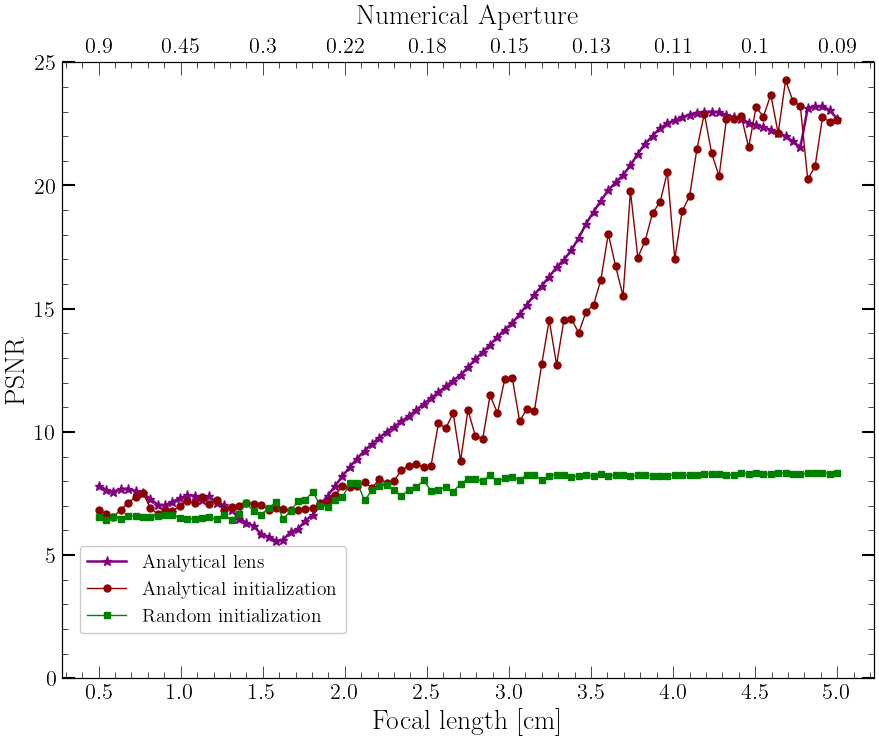

In [39]:
fig,ax = plt.subplots(1,1,figsize = (13,8))
fig.subplots_adjust(right=0.75)

#twin1 = ax.twinx()
# twin2 = ax.twinx()
markersize=5
linewidth = 1.8
l0, = ax.plot(distances, cooperative_psnr, label = 'Analytical lens', marker = '*', linestyle = '-', color = 'purple', linewidth= linewidth, markersize=markersize+1.8)
l1, = ax.plot(distances, cooperative_psnr_lens, label = 'Analytical initialization', marker='o', color = 'darkred', markersize=markersize)
l2, = ax.plot(distances, cooperative_psnr_random, label = 'Random initialization', marker = 's', color = 'green', markersize=markersize)
# l3, = twin2.plot(distances, d/distances, label="Numerical aperture", color='navy', linewidth = linewidth)



integer = 5
#ticklabels = [round(distances[i*integer]*50,2) for i in range(0,len(distances)//integer)]
#ticks = [i*integer for i in range(0,len(distances)//integer)]
ticklabels = [0.5 * i for i in range(1,11)]
ticks = [i/100 for i in range(1,(len(distances)//10)+1)]


val = np.max(np.where(distances < 0.04))



tkw = dict(size=4, width=1.5)

fontsize_labels = 20

ax.set_xticks(ticks = ticks, labels = ticklabels, fontsize = 16)
ax.tick_params(axis='y', labelsize = 16, **tkw)
#ax.yaxis.label.set_color(l0.get_color())
ax.set_ylabel("PSNR", fontsize = fontsize_labels)
ax.set_xlabel("Focal length [cm]", fontsize = fontsize_labels)
ax.tick_params(which='minor', length=4)
ax.tick_params(which='major', length=9)
ax.set_ylim(0,25)
# twin1.set_ylabel("F1 score", fontsize = fontsize_labels)
# #twin1.set_title("F1 score for the test set (N=1000)")
# twin1.tick_params(axis='y', colors=l1.get_color(), labelsize = 11, **tkw)
# twin1.yaxis.label.set_color(l1.get_color())
# twin1.yaxis.set_ticks_position("left")
# twin1.yaxis.set_label_position("left")
# twin1.spines.left.set_position(("axes", -0.087))


# twin2.set_ylabel("Numerical aperture", fontsize = fontsize_labels)
# twin2.tick_params(axis='y', colors=l3.get_color(), labelsize = 16, **tkw)
# twin2.yaxis.label.set_color(l3.get_color())
# twin2.tick_params(which='minor', length=4)
# twin2.tick_params(which='major', length=9)
# twin2.set_ylim(0,1)

ax2 = ax.twiny()
na = np.round(d/distances)
ax_ticklabels = [round(d/t,2) for t in ticks]
ax2.set_xticks(ticks = ticks, labels = ax_ticklabels, fontsize=16)
ax2.plot(distances, cooperative_mse, linestyle = '-', color = 'purple', linewidth=0)
# ax2.plot(distances, cooperative_mse, label = 'MSE image comparison', linestyle = '-', color = 'plum', linewidth= linewidth)
# ax2.scatter(distances, cooperative_mse, marker = 'v', color = 'purple', zorder=10)

ax2.set_xlabel('Numerical Aperture', fontsize=fontsize_labels, labelpad=10)
ax2.tick_params(which='minor', length=4)
ax2.tick_params(which='major', length=9)


#twin1.set_ylim(0,25)
ax.legend(loc='upper left', bbox_to_anchor=(0.01,0.23), handles = [l0,l1,l2], frameon=True, fontsize=14, framealpha=1)
fig.savefig("classifierOptimized_psnr_na.pdf")

In [ ]:
fig,ax = plt.subplots(1,1,figsize = (13,8))
fig.subplots_adjust(right=0.75)

#twin1 = ax.twinx()
# twin2 = ax.twinx()
markersize=5
linewidth = 1.8
l0, = ax.plot(distances, f1_analytical, label = 'Analytical lens', marker = '*', linestyle = '-', color = 'purple', linewidth= linewidth, markersize=markersize+1.8)
l1, = ax.plot(distances, f1_analytical_optim, label = 'Analytical initialization', marker='o', color = 'darkred', markersize=markersize)
l2, = ax.plot(distances, f1_random_optim, label = 'Random initialization', marker = 's', color = 'green', markersize=markersize)
# l3, = twin2.plot(distances, d/distances, label="Numerical aperture", color='navy', linewidth = linewidth)



integer = 5
#ticklabels = [round(distances[i*integer]*50,2) for i in range(0,len(distances)//integer)]
#ticks = [i*integer for i in range(0,len(distances)//integer)]

ticklabels = [0.5 * i for i in range(1,11)]
ticks = [i/100 for i in range(1,(len(distances)//10)+1)]

val = np.max(np.where(distances < 0.04))



tkw = dict(size=4, width=1.5)
fontsize_labels = 20

ax.set_xticks(ticks = ticks, labels = ticklabels, fontsize = 16)
ax.tick_params(axis='y', labelsize = 16, **tkw)
ax.set_ylabel("F1 score", fontsize = fontsize_labels)
#ax.yaxis.label.set_color(l0.get_color()
#ax.set_ylabel("Mean squared error", fontsize = fontsize_labels)
ax.set_xlabel("Focal length [cm]", fontsize = fontsize_labels)
ax.tick_params(which='minor', length=4)
ax.tick_params(which='major', length=9)
ax.set_ylim(0,1)
# 
# #twin1.set_title("F1 score for the test set (N=1000)")
# twin1.tick_params(axis='y', colors=l1.get_color(), labelsize = 11, **tkw)
# twin1.yaxis.label.set_color(l1.get_color())
# twin1.yaxis.set_ticks_position("left")
# twin1.yaxis.set_label_position("left")
# twin1.spines.left.set_position(("axes", -0.087))


# twin2.set_ylabel("Numerical aperture", fontsize = fontsize_labels)
# twin2.tick_params(axis='y', colors=l3.get_color(), labelsize = 16, **tkw)
# twin2.yaxis.label.set_color(l3.get_color())
# twin2.tick_params(which='minor', length=4)
# twin2.tick_params(which='major', length=9)
# twin2.set_ylim(0,1)

ax2 = ax.twiny()
na = d/distances
ax_ticklabels = [d/t for t in ticks]
ax2.set_xticks(ticks = ticks, labels = ax2_ticklabels, fontsize=16)
ax2.plot(distances, cooperative_mse, linestyle = '-', color = 'purple', linewidth=0)
# ax2.plot(distances, cooperative_mse, label = 'MSE image comparison', linestyle = '-', color = 'plum', linewidth= linewidth)
# ax2.scatter(distances, cooperative_mse, marker = 'v', color = 'purple', zorder=10)

ax2.set_xlabel('Numerical Aperture', fontsize=fontsize_labels, labelpad=10)
ax2.tick_params(which='minor', length=4)
ax2.tick_params(which='major', length=9)

#twin1.set_ylim(0,25)
ax.legend(loc='upper left', bbox_to_anchor=(0.01,0.23), handles = [l0,l1,l2], frameon=True, fontsize=14, framealpha=0.7)
fig.savefig("classifierOptimized_f1_na.pdf")

---
---
---

In [ ]:
distances

In [ ]:
# Colors to separate the boxes
colors = ['purple','darkred','green'] 
labels = ['Analytical lens', 'Analytical initialization', 'Random initialization']

# Initialize the figure
fig,ax = plt.subplots(1,1,figsize=(8,4))

# Plot the data. Note the positions
vp0 = ax.violinplot((f1_analytical, f1_analytical_optim, f1_random_optim), showmeans=True)



tkw = dict(size=4, width=1.5)
fontsize_labels = 20
ax.tick_params(axis='y', labelsize = 16, **tkw)
ax.set_ylabel("F1 score", fontsize = fontsize_labels)
ax.tick_params(which='minor', length=0)
ax.tick_params(which='major', length=9, top=False, bottom=False)
ax.grid(axis='y', visible=True)

ticks = [1,2,3]
ticklabels = ['Analytical lens', 'Analytical initialization', 'Random initialization']
ax.set_xticks(ticks = ticks, labels = ticklabels, fontsize = 14)

# for i,partname in enumerate(('cbars','cmins','cmaxes','cmeans')):
hatches = ['/', "\\", 'x']

counter = 0
for i,part in enumerate(vp0):
    if part == 'bodies':
        for j,p in enumerate(vp0[part]):
            p.set_facecolor(colors[j])
            p.set_edgecolor('black')
            #p.set_hatch(hatches[j])
            p.set_alpha(0.7)
            p.set_zorder(5)
            p.set_linewidth(1.5)
        counter += 1
    else:
        vp0[part].set_edgecolor('black')
        vp0[part].set_zorder(6)
        vp0[part].set_linewidth(1.5)

legend_patches = [plt.Rectangle((0,0),6,6,fc=color, hatch=hatches[i]) for i,color in enumerate(colors)]
ax.set_ylim(0,1)

#ax.legend(legend_patches, labels, loc='best', bbox_to_anchor=(1.5,1), prop={'size':15})

fig.savefig("violin_f1.pdf")